In [29]:
import pickle as pkl
import cv2
import ipywidgets as widgets
from IPython.display import display
import os
import re
from collections import defaultdict
from pprint import pprint
import torch
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [165]:
video_id = "07BSH.mp4"

In [166]:
pred = pkl.load(open(f'output/predcls/{video_id}/pred.pkl', 'rb'))
semi_con = pkl.load(open(f'output/predcls/{video_id}/no_constraint.pkl', 'rb'))

In [167]:
semi_con.keys()

dict_keys(['07BSH.mp4/000082.png', '07BSH.mp4/000087.png', '07BSH.mp4/000244.png', '07BSH.mp4/000260.png', '07BSH.mp4/000406.png', '07BSH.mp4/000433.png', '07BSH.mp4/000567.png', '07BSH.mp4/000729.png', '07BSH.mp4/000778.png', '07BSH.mp4/000786.png', '07BSH.mp4/000831.png', '07BSH.mp4/000877.png', '07BSH.mp4/000923.png'])

In [168]:
pred.keys()

dict_keys(['boxes', 'labels', 'scores', 'im_idx', 'pair_idx', 'human_idx', 'features', 'union_feat', 'union_box', 'spatial_masks', 'attention_gt', 'spatial_gt', 'contacting_gt', 'pred_labels', 'rel_features', 'rel_mem_features', 'attention_distribution', 'spatial_distribution', 'contacting_distribution'])

In [169]:
for k in pred.keys():
    print(f"{k} -- {len(pred[k]) if type(pred[k]) == list else pred[k].shape}")


boxes -- torch.Size([35, 5])
labels -- torch.Size([35])
scores -- torch.Size([35])
im_idx -- torch.Size([22])
pair_idx -- torch.Size([22, 2])
human_idx -- torch.Size([13, 1])
features -- torch.Size([35, 2048])
union_feat -- torch.Size([22, 1024, 7, 7])
union_box -- torch.Size([22, 5])
spatial_masks -- torch.Size([22, 2, 27, 27])
attention_gt -- 22
spatial_gt -- 22
contacting_gt -- 22
pred_labels -- torch.Size([35])
rel_features -- torch.Size([22, 1936])
rel_mem_features -- torch.Size([22, 1936])
attention_distribution -- torch.Size([22, 3])
spatial_distribution -- torch.Size([22, 6])
contacting_distribution -- torch.Size([22, 17])


In [170]:
boxes = pred["boxes"]
labels = pred["labels"]
scores = pred["scores"]
im_idx = pred["im_idx"]
pair_idx = pred["pair_idx"]
human_idx = pred["human_idx"]
features = pred["features"]
union_feat = pred["union_feat"]
union_box = pred["union_box"]
spatial_masks = pred["spatial_masks"]
attention_gt = pred["attention_gt"]
spatial_gt = pred["spatial_gt"]
contacting_gt = pred["contacting_gt"]
pred_labels = pred["pred_labels"]
rel_features = pred["rel_features"]
rel_mem_features = pred["rel_mem_features"]
attention_distribution = pred["attention_distribution"]
spatial_distribution = pred["spatial_distribution"]
contacting_distribution = pred["contacting_distribution"]


In [171]:
# Load txt file
object_classes = []
with open('/home/pali/datasets/charades/dataset/ag/annotations/object_classes.txt', 'r') as file:
    for line in file:
        object_classes.append(line.strip()) 
        
relationship_classes = []
with open('/home/pali/datasets/charades/dataset/ag/annotations/relationship_classes.txt', 'r') as file:
    for line in file:
        relationship_classes.append(line.strip())

In [172]:
# Path to the directory containing the frames
frames_dir = f'/home/pali/datasets/charades/dataset/ag/frames/{video_id}/'

# Load and sort the frames
frame_files = os.listdir(frames_dir)
frame_files = sorted(frame_files, key=lambda x: int(re.search(r'\d+', x).group()))

frames = []
for frame_file in frame_files:
    frame_path = os.path.join(frames_dir, frame_file)
    frame = cv2.imread(frame_path)
    if frame is not None:
        frames.append(frame)

print(f"Total frames: {len(frames)}")


Total frames: 15


In [173]:
def interactive_plot(data, frames, threshold=0.7):
    # Function to display the frame with bounding boxes
    def display_frame(frame_index):
        frame = frames[frame_index].copy()
        
        # # Draw bounding boxes for the current frame
        # for bbox in frame_bboxes[frame_index]:
        #     x1, y1, x2, y2, label, score = bbox
        #     cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            
        #     text = f'{label} {score:.2f}'

        #     # Calculate the size of the label to create a background for readability
        #     (label_width, label_height), baseline = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)
        #     cv2.rectangle(frame, (int(x1), int(y1) - label_height - baseline), (int(x1) + label_width, int(y1)), (0, 255, 0), cv2.FILLED)
        #     cv2.putText(frame, text, (int(x1), int(y1) - baseline), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
        
        for sgg in data[frame_index]:
            
            
            # subject = sgg["subject"]
            # object = sgg["object"]
            # x1, y1, x2, y2, = sgg["box"]
            # score = sgg["score"]
            # pred_label = sgg["pred_label"]
            # pred_score = sgg["pred_score"]
            # attn = sgg["attn"]
            # spat = sgg["spat"]
            # cont = sgg["cont"]

            # for object in sgg:

            print(sgg)
            obj_1_x1, obj_1_y1, obj_1_x2, obj_1_y2 = sgg["object1"]["box"]
            obj_2_x1, obj_2_y1, obj_2_x2, obj_2_y2 = sgg["object2"]["box"]

            #     # if score > threshold:
            cv2.rectangle(frame, (int(obj_1_x1), int(obj_1_y1)), (int(obj_1_x2), int(obj_1_y2)), (0, 255, 0), 2)
            cv2.rectangle(frame, (int(obj_2_x1), int(obj_2_y1)), (int(obj_2_x2), int(obj_2_y2)), (0, 255, 0), 2)
                # pprint.pprint(sgg)
                # print(f'<{subject}, {object}>')
                # max_attn = torch.argmax(attn)
                # max_spat = torch.argmax(spat)
                # max_cont = torch.argmax(cont)
                # print(f'Attn: {relationship_classes[max_attn]} - score: {attn[max_attn]}')
                # print(f'Spat: {relationship_classes[max_spat]} - score: {spat[max_spat]}')
                # print(f'Cont: {relationship_classes[max_cont]} - score: {cont[max_cont]}')
            # pprint({
            #     "pred_label": object_classes[pred_label-1],
            #     "score": score
            # })
            # print('*'*60)
            # print(f'<{subject}, {object}>')

        # Display the frame with bounding boxes
        frame_widget = widgets.Image(value=cv2.imencode('.jpg', frame)[1].tobytes())
        display(frame_widget)

    # Create the interactive widgets
    frame_index_slider = widgets.IntSlider(min=0, max=len(data)-1, value=0)

    # Update the frame when the slider value changes
    return widgets.interactive(display_frame, frame_index=frame_index_slider)

In [174]:
data = defaultdict(list)

In [175]:
data = defaultdict(list)
for i, box in enumerate(boxes):
    im_i = int(box[0])
    bbox = box[1:]
    score = scores[i]
    pred_label = pred_labels[i]

    data[im_i].append({
        'box': bbox,
        'score': score,
        'pred_label': pred_label
    })


In [176]:
interactive_plot(data, frames, threshold=0.967)

interactive(children=(IntSlider(value=0, description='frame_index', max=12), Output()), _dom_classes=('widget-…

In [177]:
# First, prepare a dictionary for quick access to box information by its index
box_info_by_idx = {}
for i, box in enumerate(boxes):
    im_i = int(box[0])
    bbox = box[1:]
    score = scores[i].item()
    pred_label = pred_labels[i].item()  # Assuming these are indices into some label list
    box_info_by_idx[i] = {
        'im_idx': im_i,
        'box': bbox.numpy().tolist(),  # Convert tensors to list for JSON-serializability if needed
        'score': score,
        'pred_label': pred_label
    }

In [178]:
# Iterate over pair_idx to form triplets
triplets = defaultdict(list)
for i, pair in enumerate(pair_idx):
    idx1, idx2 = pair.tolist()  # Convert tensor to list
    im_i = box_info_by_idx[idx1]['im_idx']  # Assuming both boxes are from the same image

    # Retrieve object and relation information
    object1 = box_info_by_idx[idx1]
    object2 = box_info_by_idx[idx2]
    relation = attention_gt[i]  # Or spatial_gt[i], contacting_gt[i], as needed

    # Append the triplet to the list for the corresponding image index
    triplets[im_i].append({
        'object1': object1,
        'relation': relation,
        'object2': object2
    })


In [179]:
triplets

defaultdict(list,
            {0: [{'object1': {'im_idx': 0,
                'box': [168.27703857421875,
                 116.87454223632812,
                 239.3544921875,
                 316.2937927246094],
                'score': 1.0,
                'pred_label': 1},
               'relation': [0],
               'object2': {'im_idx': 0,
                'box': [370.0635070800781,
                 344.73809814453125,
                 480.0,
                 359.73809814453125],
                'score': 1.0,
                'pred_label': 16}},
              {'object1': {'im_idx': 0,
                'box': [168.27703857421875,
                 116.87454223632812,
                 239.3544921875,
                 316.2937927246094],
                'score': 1.0,
                'pred_label': 1},
               'relation': [0],
               'object2': {'im_idx': 0,
                'box': [219.70462036132812, 198.5, 312.0, 319.5399475097656],
                'score': 1.0,
         

In [181]:
interactive_plot(triplets, frames, threshold=0.967)

interactive(children=(IntSlider(value=0, description='frame_index', max=12), Output()), _dom_classes=('widget-…

In [182]:
triplets[0]

[{'object1': {'im_idx': 0,
   'box': [168.27703857421875,
    116.87454223632812,
    239.3544921875,
    316.2937927246094],
   'score': 1.0,
   'pred_label': 1},
  'relation': [0],
  'object2': {'im_idx': 0,
   'box': [370.0635070800781, 344.73809814453125, 480.0, 359.73809814453125],
   'score': 1.0,
   'pred_label': 16}},
 {'object1': {'im_idx': 0,
   'box': [168.27703857421875,
    116.87454223632812,
    239.3544921875,
    316.2937927246094],
   'score': 1.0,
   'pred_label': 1},
  'relation': [0],
  'object2': {'im_idx': 0,
   'box': [219.70462036132812, 198.5, 312.0, 319.5399475097656],
   'score': 1.0,
   'pred_label': 35}}]

In [183]:
for k, v in semi_con.items():
    pprint(v)

{'triplet_boxes': array([[370.06350708, 344.73809814, 480.        , 359.73809814,
        168.27703857, 116.87454224, 239.35449219, 316.29379272],
       [219.70462036, 198.5       , 312.        , 319.53994751,
        168.27703857, 116.87454224, 239.35449219, 316.29379272],
       [168.27703857, 116.87454224, 239.35449219, 316.29379272,
        219.70462036, 198.5       , 312.        , 319.53994751],
       [168.27703857, 116.87454224, 239.35449219, 316.29379272,
        370.06350708, 344.73809814, 480.        , 359.73809814],
       [168.27703857, 116.87454224, 239.35449219, 316.29379272,
        219.70462036, 198.5       , 312.        , 319.53994751],
       [168.27703857, 116.87454224, 239.35449219, 316.29379272,
        370.06350708, 344.73809814, 480.        , 359.73809814],
       [168.27703857, 116.87454224, 239.35449219, 316.29379272,
        370.06350708, 344.73809814, 480.        , 359.73809814],
       [168.27703857, 116.87454224, 239.35449219, 316.29379272,
        370.063

*triplet_scores*: contains the confidence scores for each part of the triplet: [object 1 score, object 2 score, relationship score].

*triplet_labels* contains the labels for the triplets, where each triplet is [object 1 label, object 2 label, relationship label].

*triplet_boxes* provides the bounding boxes for the objects in each triplet. Each entry contains eight numbers, representing the bounding boxes for object 1 and object 2, respectively: [x1, y1, x2, y2, x3, y3, x4, y4], where (x1, y1, x2, y2) are the coordinates for object 1's bounding box and (x3, y3, x4, y4) for object 2's.

In [184]:
semi_con["07QNG.mp4/000034.png"].keys()

KeyError: '07QNG.mp4/000034.png'

floor -- above --> person
vacuum -- beneath --> person
person -- haveitontheback --> vacuum
person -- sittingon --> floor
person -- writingon --> vacuum
person -- writingon --> floor


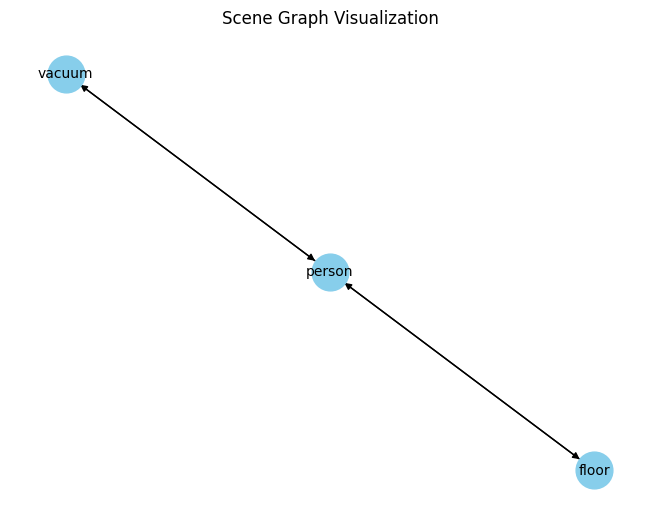

floor -- above --> person
vacuum -- beneath --> person
person -- haveitontheback --> vacuum
person -- sittingon --> floor
person -- writingon --> vacuum


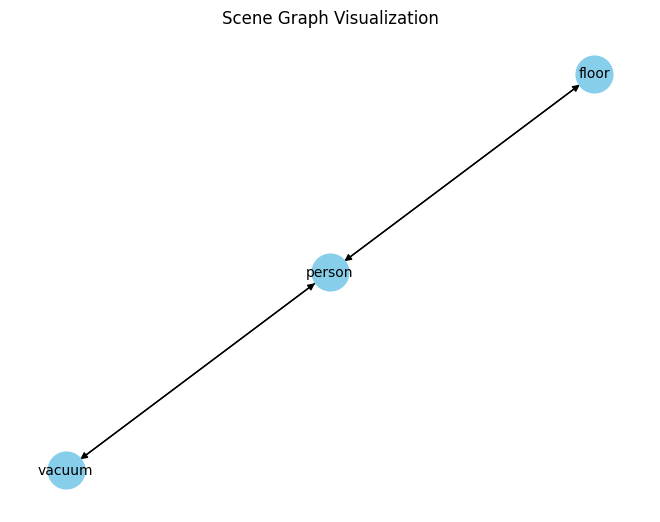

floor -- above --> person
person -- sittingon --> floor
person -- writingon --> floor
person -- haveitontheback --> vacuum
vacuum -- beneath --> person


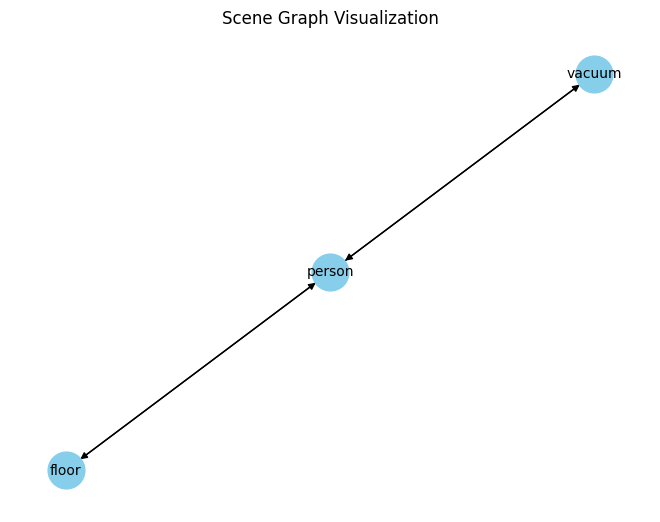

person -- haveitontheback --> vacuum
vacuum -- beneath --> person
person -- writingon --> vacuum


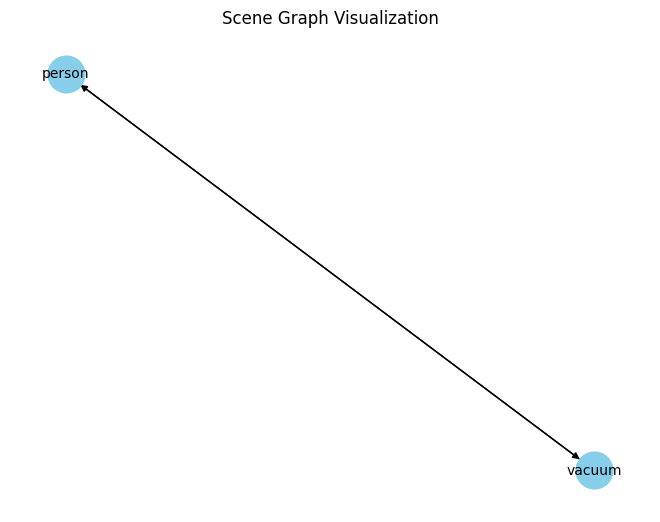

vacuum -- beneath --> person
person -- haveitontheback --> vacuum


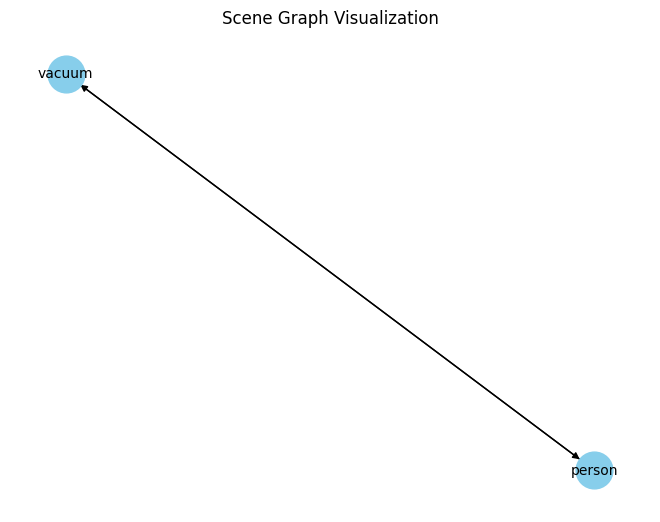

floor -- above --> person
person -- sittingon --> floor
vacuum -- beneath --> person
person -- haveitontheback --> vacuum
person -- writingon --> vacuum
person -- notlookingat --> floor


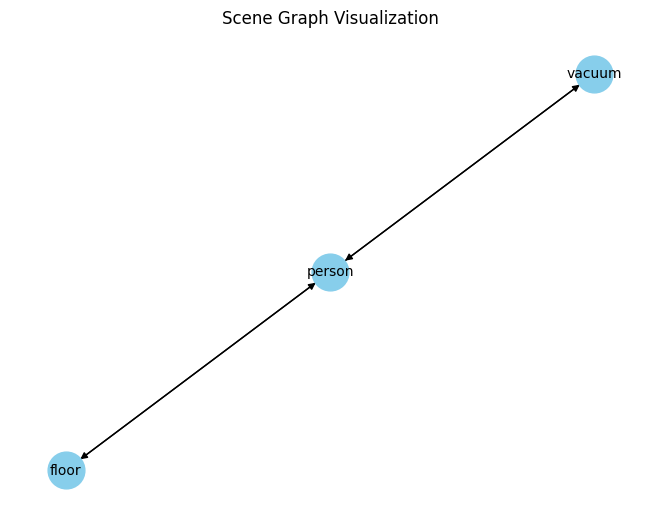

person -- haveitontheback --> vacuum
vacuum -- beneath --> person
person -- writingon --> vacuum


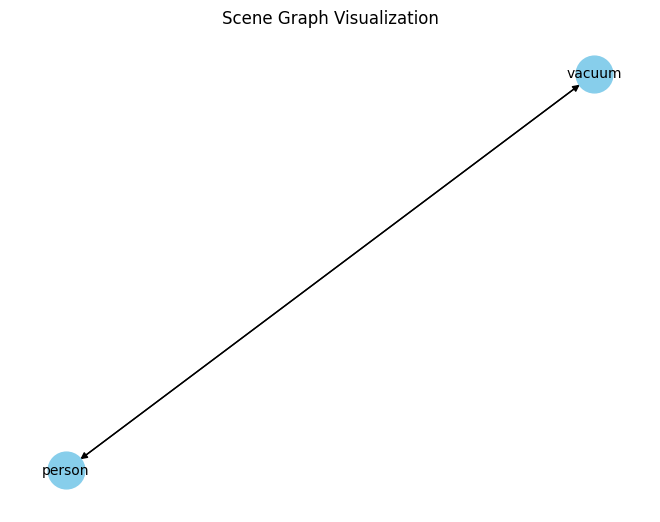

floor -- above --> person
person -- haveitontheback --> vacuum
person -- sittingon --> floor
vacuum -- beneath --> person
person -- writingon --> vacuum


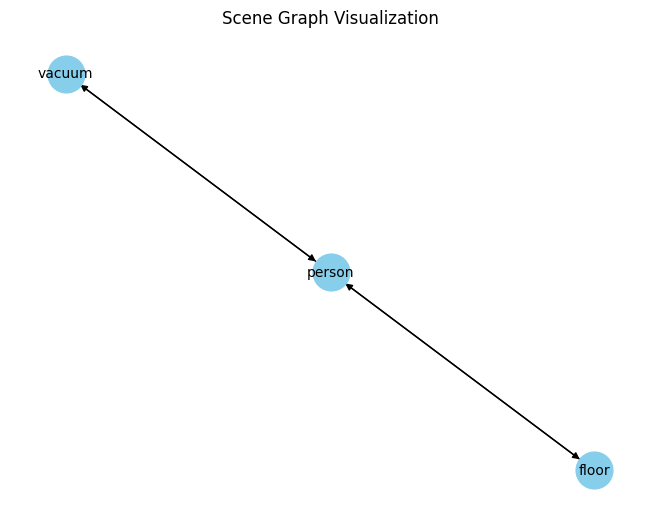

person -- writingon --> vacuum
floor -- above --> person
person -- sittingon --> floor
vacuum -- beneath --> person
person -- lyingon --> bag
person -- lookingat --> bag
bag -- beneath --> person
person -- writingon --> floor


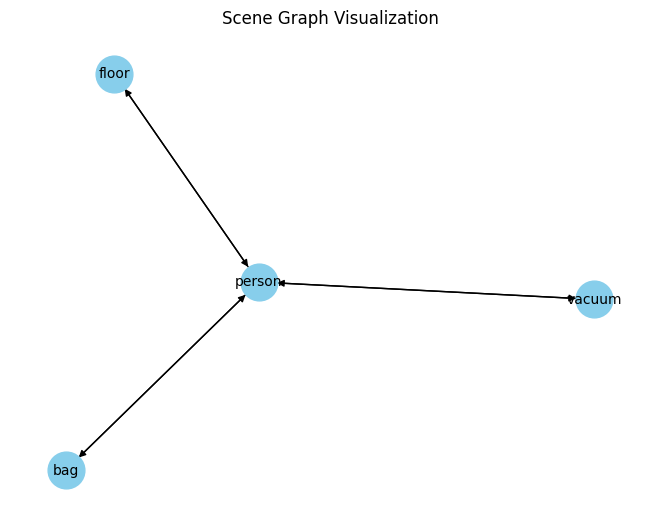

floor -- above --> person
person -- writingon --> vacuum
person -- lyingon --> bag
vacuum -- beneath --> person
person -- sittingon --> floor
person -- lookingat --> bag
bag -- beneath --> person
person -- writingon --> floor


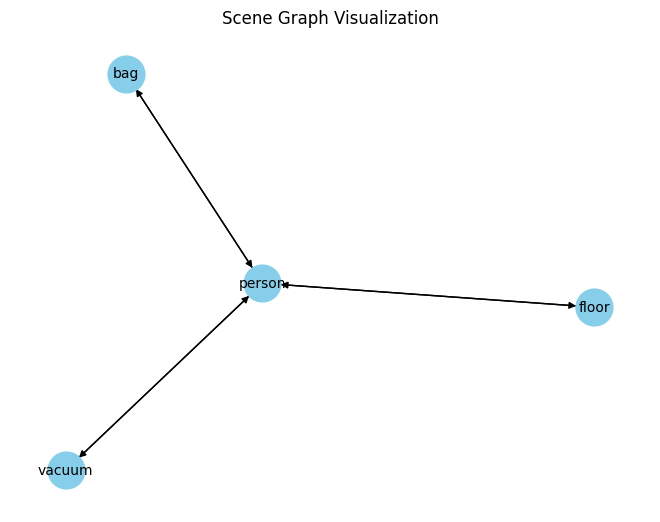

person -- writingon --> bag
bag -- beneath --> person
person -- haveitontheback --> bag


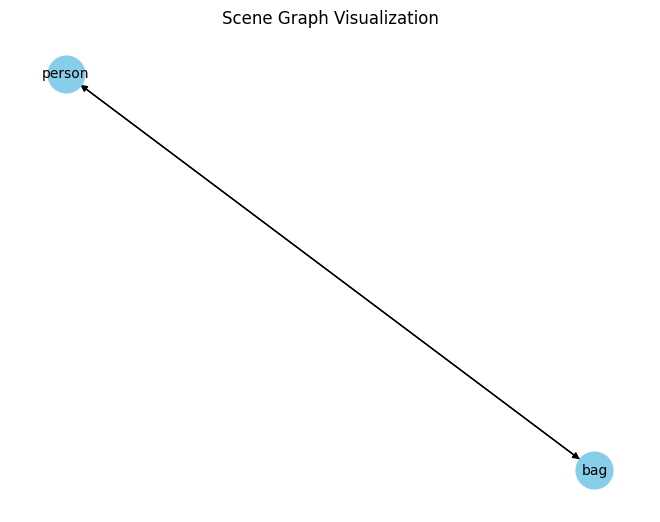

person -- lookingat --> bag
person -- haveitontheback --> bag
bag -- beneath --> person


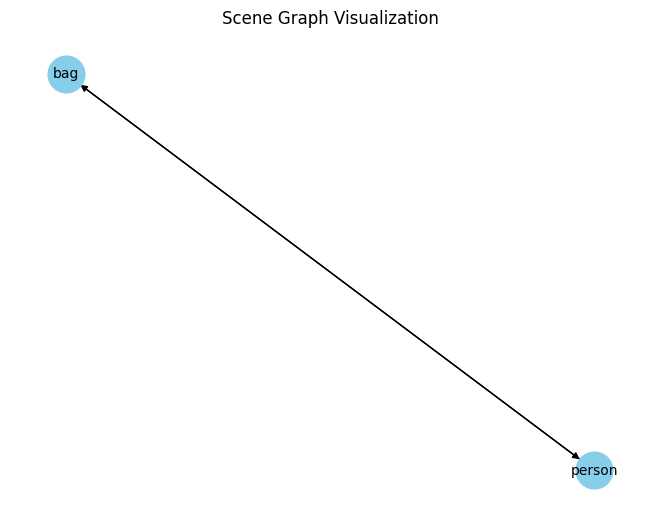

person -- haveitontheback --> bag
person -- lookingat --> bag


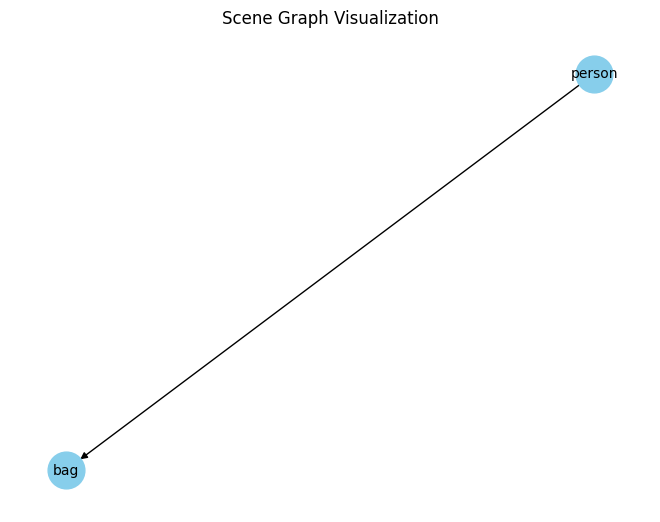

In [189]:
# This is a placeholder function. Replace it with your actual label mappings.
def get_label_name(label_id):
    # Placeholder: Map label ID to a string. You should replace this with your actual mapping.
    return object_classes[label_id-1]

def get_relationship_name(relationship_id):
    # Placeholder: Map relationship ID to a string. You should replace this with your actual mapping.
    return relationship_classes[relationship_id-1]


# semi_con_example = semi_con["00T1E.mp4/000297.png"]
scene_graph_data = defaultdict(list)
for k, semi_con_example in semi_con.items():
    # Initialize an empty graph
    G = nx.DiGraph()

    # Iterate over the triplets to add nodes and edges
    for labels, boxes, scores in zip(semi_con_example['triplet_labels'], semi_con_example['triplet_boxes'], semi_con_example["triplet_scores"]):
        if scores[2] < 0.92: continue
        obj1_label, relationship_label, obj2_label = labels
        obj1_name = get_label_name(obj1_label)
        obj2_name = get_label_name(obj2_label)
        relationship_name = get_relationship_name(relationship_label)

        # Add nodes for the objects if they're not already in the graph
        if obj1_name not in G:
            G.add_node(obj1_name, box=boxes[:4])
        if obj2_name not in G:
            G.add_node(obj2_name, box=boxes[4:])

        # Add an edge for the relationship
        G.add_edge(obj1_name, obj2_name, relationship=relationship_name)

        print(f'{obj1_name} -- {relationship_name} --> {obj2_name}')
        scene_graph_data[k].append({
            'obj_1': obj1_name,
            'obj_2': obj2_name,
            'relationship': relationship_name
        })


    # Draw the graph
    pos = nx.spring_layout(G)  # This is one way to layout graphs; you might need to customize this.
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=700, edge_color='k', linewidths=1, font_size=10, arrows=True, arrowstyle='-|>')
    plt.title('Scene Graph Visualization')
    plt.show()

**015XE**

Description: A person is taking a picture of a light while sitting in a chair.

Captions: 
- A person holds a camera up to a light on the ceiling
- A person in a bedroom appears to use their phone to film or take a picture of the light fixture on the ceiling.
- A person is in a kitchen.  The person is taking a picture of the light in the kitchen.


**07QNG**

Description: A person is in the bedroom doing homework and watching tv in the background. They stop to pour some water in a glass and take a drink, then they sit it down and get back to homework.

Captions: 
- The person in the video is watching a video and writing something on a piece of paper, then gets up and gets something to drink and sits back down.
- A person is sitting on a bed doing homework while they are watching tv the get up and pour a cup of juice then they sit back down on the bed and continue to do their homework.
- A person is sitting and working on their homework. The person is also watching television. The person stands up, pours water, and drinks it. The person goes back to sitting and working on their homework.


**07BSH**

Description: The person is vacuuming in the living room of their home.  They then realize they forgot to do their work of putting the groceries away.

Captions: 
- A person is vacuuming the living room floor then picks up some bags from the floor and leaves the room.
- A person vacuums the floor in the living room before bending over and picking up two bags and walking out.

In [190]:
def scene_graph_to_text_prompt(scene_graph_data):
    object_descriptions = []
    relationship_descriptions = []
    
    # Describe each object
    for i, (k, v) in enumerate(scene_graph_data.items()):
        frame = k.split('/')[-1]
        rel_desc = []
        for sg in v:
            obj1_desc = f"There is a {sg['obj_1']}."
            obj2_desc = f"There is a {sg['obj_2']}."
            if obj1_desc not in object_descriptions:
                object_descriptions.append(obj1_desc)
            if obj2_desc not in object_descriptions:
                object_descriptions.append(obj2_desc)

            # Describe the relationship
            rel_desc.append(
                f"The {sg['obj_1']} is {sg['relationship']} {sg['obj_2']}."
            )
        relationship_descriptions.append(f'In frame {i}:\n- ' + '\n- '.join(rel_desc))

    # Combine descriptions
    prompt = "All objects in the scene:\n- " + "\n- ".join(object_descriptions) + "\n\n"
    prompt += "Relationships in the scene:\n- " + "\n- ".join(relationship_descriptions)
    # prompt = "In the scene:\n- " + "\n- ".join(object_descriptions + relationship_descriptions)
    
    return prompt

# Convert the scene graph data to a text prompt
text_prompt = scene_graph_to_text_prompt(scene_graph_data)
print(text_prompt)

All objects in the scene:
- There is a floor.
- There is a person.
- There is a vacuum.
- There is a bag.

Relationships in the scene:
- In frame 0:
- The floor is above person.
- The vacuum is beneath person.
- The person is haveitontheback vacuum.
- The person is sittingon floor.
- The person is writingon vacuum.
- The person is writingon floor.
- In frame 1:
- The floor is above person.
- The vacuum is beneath person.
- The person is haveitontheback vacuum.
- The person is sittingon floor.
- The person is writingon vacuum.
- In frame 2:
- The floor is above person.
- The person is sittingon floor.
- The person is writingon floor.
- The person is haveitontheback vacuum.
- The vacuum is beneath person.
- In frame 3:
- The person is haveitontheback vacuum.
- The vacuum is beneath person.
- The person is writingon vacuum.
- In frame 4:
- The vacuum is beneath person.
- The person is haveitontheback vacuum.
- In frame 5:
- The floor is above person.
- The person is sittingon floor.
- The

In [187]:
scene_graph_data

defaultdict(list,
            {'07BSH.mp4/000082.png': [{'obj_1': 'floor',
               'obj_2': 'person',
               'relationship': 'above'},
              {'obj_1': 'vacuum',
               'obj_2': 'person',
               'relationship': 'beneath'},
              {'obj_1': 'person',
               'obj_2': 'vacuum',
               'relationship': 'haveitontheback'},
              {'obj_1': 'person',
               'obj_2': 'floor',
               'relationship': 'sittingon'},
              {'obj_1': 'person',
               'obj_2': 'vacuum',
               'relationship': 'writingon'},
              {'obj_1': 'person',
               'obj_2': 'floor',
               'relationship': 'writingon'}],
             '07BSH.mp4/000087.png': [{'obj_1': 'floor',
               'obj_2': 'person',
               'relationship': 'above'},
              {'obj_1': 'vacuum',
               'obj_2': 'person',
               'relationship': 'beneath'},
              {'obj_1': 'person',
     

In [188]:
object_classes

['person',
 'bag',
 'bed',
 'blanket',
 'book',
 'box',
 'broom',
 'chair',
 'closetcabinet',
 'clothes',
 'cupglassbottle',
 'dish',
 'door',
 'doorknob',
 'doorway',
 'floor',
 'food',
 'groceries',
 'laptop',
 'light',
 'medicine',
 'mirror',
 'papernotebook',
 'phonecamera',
 'picture',
 'pillow',
 'refrigerator',
 'sandwich',
 'shelf',
 'shoe',
 'sofacouch',
 'table',
 'television',
 'towel',
 'vacuum',
 'window']